# Plot the data for a specific subid

Read from the results file and plot a specifc file in the required format.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np

Declare constants

In [2]:
from modules.config import RESULTS_DIR, RESULTS_FILE
RUNID = '20250413-21-03-35'
SUBID = '09-21-45'

Load relevant data from results file:

In [3]:
results_file = Path(RESULTS_DIR).joinpath(RESULTS_FILE)
df_summary = pd.read_csv(results_file)
df_summary = df_summary[df_summary['runid'] == RUNID]
df_summary = df_summary[df_summary['subid'] == SUBID]
df_summary.head()
best = df_summary['best_dist'].astype(float)

Load detailed data:

In [4]:
filename  = f'{SUBID}.csv'
df_detailed = pd.read_csv(Path(RESULTS_DIR).joinpath(RUNID,filename))
df_detailed.drop('index_list', axis=1, inplace=True)
df_detailed['best_dist'] = best.values[0]
df_detailed.head()

,average_list,lowest_list,sliced_list,best_dist
0,634.298340,398.9,616.466528,297.2
1,630.796680,378.2,616.879736,297.2
2,628.561230,378.2,604.678809,297.2
3,627.125879,378.2,606.584888,297.2
4,624.070117,377.8,607.196606,297.2


Plot graph

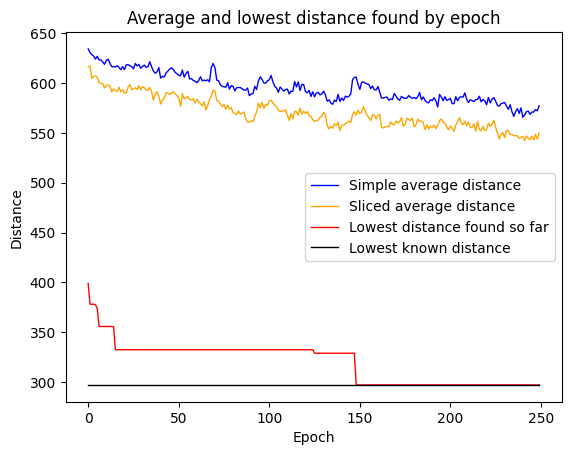

In [5]:
plt.plot(df_detailed.index, df_detailed['average_list'], linewidth=1.0, color = 'blue', label='Simple average distance')
plt.plot(df_detailed.index, df_detailed['sliced_list'], linewidth=1.0, color = 'orange', label='Sliced average distance')
plt.plot(df_detailed.index, df_detailed['lowest_list'], linewidth=1.0, color = 'red', label='Lowest distance found so far')
plt.plot(df_detailed.index, df_detailed['best_dist'], linewidth=1.0, color = 'black', label='Lowest known distance')
plt.title('Average and lowest distance found by epoch')
plt.xlabel('Epoch')
plt.ylabel('Distance')
plt.legend()
